In [208]:
import pandas as pd
import numpy as np

In [61]:
dsets = ['income', 'compas', 'german']

for d in dsets:
    df = pd.read_csv(d + '_experiment_mean.csv')
    dp_df = pd.read_csv(d + '_experiment_mean_dp.csv')
    df['e'] = np.nan
    dp_df.rename(columns={'t':'tau'}, inplace=True)
    new_df = pd.concat([df, dp_df]).reset_index(drop=True)
    new_df.drop(['kf', 'lf'], axis=1, inplace=True)
    for p in ['k', 'u', 'f']:
        new_df[p].replace(0, np.nan, inplace=True)
    new_df.rename(columns={'m': 'micro_agg',
                           'e': 'epsilon', 
                           'nc': 'neg_corr'}, inplace=True)
    cols = new_df.columns.tolist()
    cols = cols[9:12] + [cols[0]] + cols[12:] + [cols[1], cols[5]] + cols[2:5] + cols[6:9]
    new_df = new_df[cols]
    new_df.to_csv(d + '_experiment_mean_all.csv', index=False)

C:\Users\Julian\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [62]:
dsets = ['income', 'compas', 'german']

perf = ['accuracy', 'auc', 'f1']
fair = ['dpr', 'eor', 'eOdds']
params = ['k', 'u', 'f', 'tau', 'neg_corr', 'micro_agg', 'epsilon']
m_perf = ['perf_name', 'perf_val']

for d in dsets:
    df = pd.read_csv(d + '_experiment_mean_all.csv')
    melt_df = pd.melt(df, id_vars=fair+params, value_vars=perf,
                      var_name='perf_name', value_name='perf_val')
    melt_df = pd.melt(melt_df, id_vars=params+m_perf, value_vars=fair,
                      var_name='fair_name', value_name='fair_val')
    melt_df.to_csv(d + '_experiment_mean_all_melt.csv', index=False)

## Plots

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('income_experiment_mean_all.csv')
melt_df = pd.read_csv('income_experiment_mean_all_melt.csv')

In [206]:
df['cluster_size'] = np.nan_to_num(df.k) + np.nan_to_num(df.u) + np.nan_to_num(df.f)
df['cluster_type'] = ['k' if e > 0 else 'uf' if u > 0 else np.nan for e, u in zip(df.k, df.u)]

melt_df['cluster_size'] = np.nan_to_num(melt_df.k) + np.nan_to_num(melt_df.u) + np.nan_to_num(melt_df.f)
melt_df['cluster_type'] = ['k' if e > 0 else 'uf' if u > 0 else np.nan for e, u in zip(melt_df.k, melt_df.u)]

In [207]:
melt_df[melt_df.cluster_type.isnull()].head()

,k,u,f,tau,neg_corr,micro_agg,epsilon,perf_name,perf_val,fair_name,fair_val,cluster_size,cluster_type
880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,accuracy,0.850434,dpr,0.178923,0.0,NaN
1761,NaN,NaN,NaN,NaN,NaN,NaN,0.01,accuracy,0.591424,dpr,0.028318,0.0,NaN
2642,NaN,NaN,NaN,NaN,NaN,NaN,0.10,accuracy,0.698444,dpr,0.047918,0.0,NaN
3523,NaN,NaN,NaN,NaN,NaN,NaN,1.00,accuracy,0.625444,dpr,0.102253,0.0,NaN
4404,NaN,NaN,NaN,NaN,NaN,NaN,10.00,accuracy,0.663461,dpr,0.080630,0.0,NaN


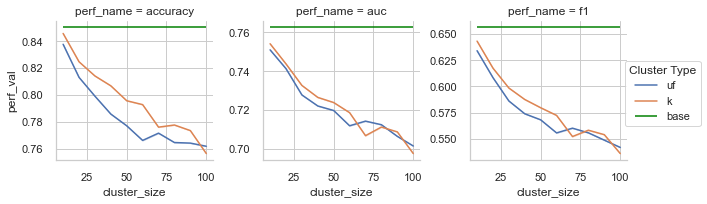

In [208]:
g = sns.FacetGrid(data=melt_df[melt_df.epsilon.isnull()
                    & (melt_df.tau == 0)
                    & (melt_df.micro_agg == 1)],
            hue="cluster_type", sharey=False,
            col='perf_name')
g.map(sns.lineplot, "cluster_size", "perf_val")

for m,ax in zip(melt_df[melt_df.cluster_type.isnull() & melt_df.epsilon.isnull()]
                .groupby('perf_name').perf_val.mean(), g.axes.ravel()):
    ax.hlines(m, xmin=10, xmax=100, colors='green', label='base')
    
plt.legend(title='Cluster Type', loc='upper right', bbox_to_anchor=(1.5, 0.75))

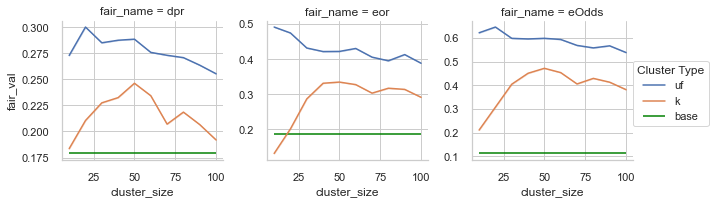

In [209]:
g = (sns.FacetGrid(data=melt_df[melt_df.epsilon.isnull()
                    & (melt_df.tau == 0)
                    & (melt_df.micro_agg == 1)],
            hue="cluster_type", sharey=False,
            col='fair_name')
     .map(sns.lineplot, "cluster_size", "fair_val")
    )

for m,ax in zip(melt_df[melt_df.cluster_type.isnull() & melt_df.epsilon.isnull()]
                .groupby('fair_name').fair_val.mean(), g.axes.ravel()):
    ax.hlines(m, xmin=10, xmax=100, colors='green', label='base')
    
plt.legend(title='Cluster Type', loc='upper right', bbox_to_anchor=(1.5, 0.75))

#### DP Experiments

In [65]:
# dsets = ['income', 'compas', 'german']

# perf = ['accuracy', 'auc', 'f1']
# fair = ['dpr', 'eor', 'eOdds']
# params = ['e', 'fold']
# m_perf = ['perf_name', 'perf_val']

# for d in dsets:
#     dp_df = pd.read_csv(d + '_DP_Experiment_all.csv')
#     melt_df = pd.melt(dp_df, id_vars=fair+params, value_vars=perf,
#                       var_name='perf_name', value_name='perf_val')
#     melt_df = pd.melt(melt_df, id_vars=params+m_perf, value_vars=fair,
#                       var_name='fair_name', value_name='fair_val')
#     melt_df.rename(columns={'e': 'epsilon'}, inplace=True)
#     melt_df.to_csv(d + '_experiment_DP_melt.csv', index=False)

In [210]:
d = 'income'
melt_df = pd.read_csv(d + '_experiment_DP_melt.csv')

df = pd.read_csv(d + '_DP_Experiment_all.csv')
df.rename(columns={'e':'epsilon'}, inplace=True)
df.epsilon.replace({np.nan:0}, inplace=True)

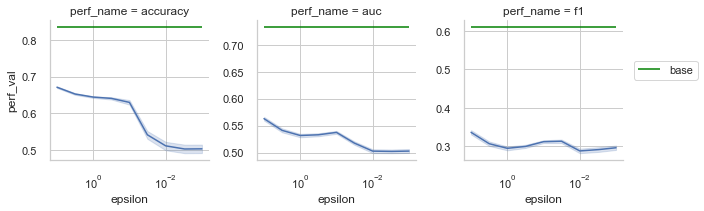

In [211]:
g = (sns.FacetGrid(data=melt_df, sharey=False, col='perf_name')
     .map(sns.lineplot, "epsilon", "perf_val")
     .set(xscale = 'log')
    )

for m,ax in zip(melt_df[melt_df.epsilon.isnull()]
                .groupby('perf_name').perf_val.mean(), g.axes.ravel()):
    ax.hlines(m, xmin=0.001, xmax=10, colors='green', label='base')

plt.xlim(reversed(plt.xlim()))
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 0.75))

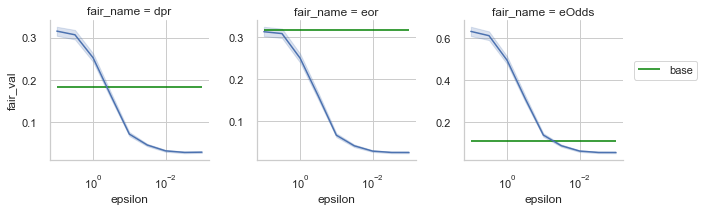

In [83]:
g = (sns.FacetGrid(data=melt_df, sharey=False, col='fair_name', col_wrap=3)
     .map(sns.lineplot, "epsilon", "fair_val")
     .set(xscale = 'log')
    )

for m,ax in zip(melt_df[melt_df.epsilon.isnull()]
                .groupby('fair_name').fair_val.mean(), g.axes.ravel()):
    ax.hlines(m, xmin=0.001, xmax=10, colors='green', label='base')

plt.xlim(reversed(plt.xlim()))
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 0.75))

In [298]:
dp_df = pd.read_csv('income_DP_Experiment_all.csv')
dp_df.drop(['Unnamed: 0'], axis=1, inplace=True)
dp_df.sort_values(by=["fold", "e"], inplace=True)
dp_df['aux'] = list(range(1000))*5
dp_df_avg = dp_df.groupby("aux").mean()
ac=dp_df_avg[dp_df_avg.e.isnull()].accuracy.mean()
dpr=dp_df_avg[dp_df_avg.e.isnull()].dpr.mean()

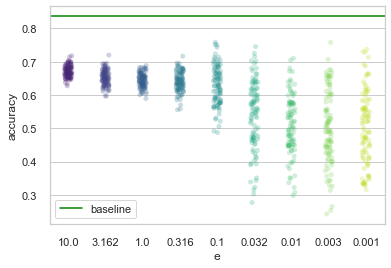

In [343]:
g = sns.stripplot(x="e", y="accuracy", data=dp_df_avg, alpha=.25, palette="viridis_r")
plt.axhline(y=ac, label="baseline", color="green")
plt.legend()
g.invert_xaxis()

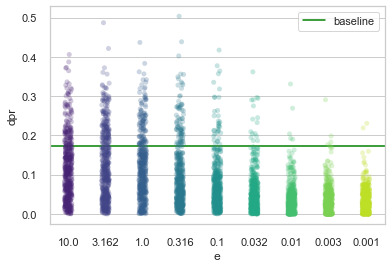

In [344]:
g = sns.stripplot(x="e", y="dpr", data=dp_df, alpha=.25, palette="viridis_r")
plt.axhline(y=dpr, label="baseline", color="green")
plt.legend()
g.invert_xaxis()

In [373]:
df = pd.read_csv('compas_experiment_mean_all.csv')
df['method'] = ['dp' + str(e) if e > 0 
                else 'uf' if u > 0 
                else 'k' 
                for e, u in zip(df.epsilon, df.u)]

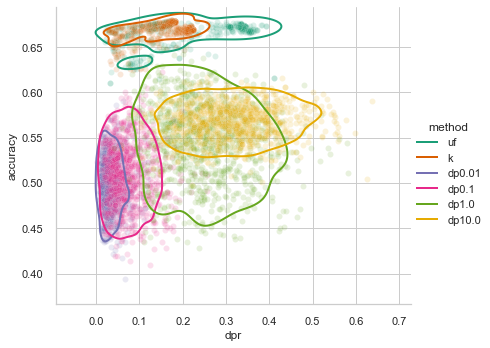

In [374]:
g = (sns.FacetGrid(data=df, hue='method', height=5, aspect=1.2, 
                   palette="Dark2")
     .map(sns.scatterplot, "dpr", "accuracy", alpha=0.15)
     .map(sns.kdeplot, "dpr", "accuracy", levels=2, thresh=0.15, linewidths=2)
     .add_legend()
    )
# plt.xlim(left=-0.05, right=0.55)
# plt.ylim(bottom=0.4)

In [381]:
dsets = ['income', 'compas', 'german']
df_list = [pd.read_csv(d + '_experiment_mean_all.csv') for d in dsets]
for a,b in zip(dsets, df_list):
    b["dset"] = a

df = pd.concat(df_list)

df['method'] = ['dp' + str(e) if e > 0 
                else 'uf' if u > 0 
                else 'k' 
                for e, u in zip(df.epsilon, df.u)]

(0.25, 0.8100152414460215)

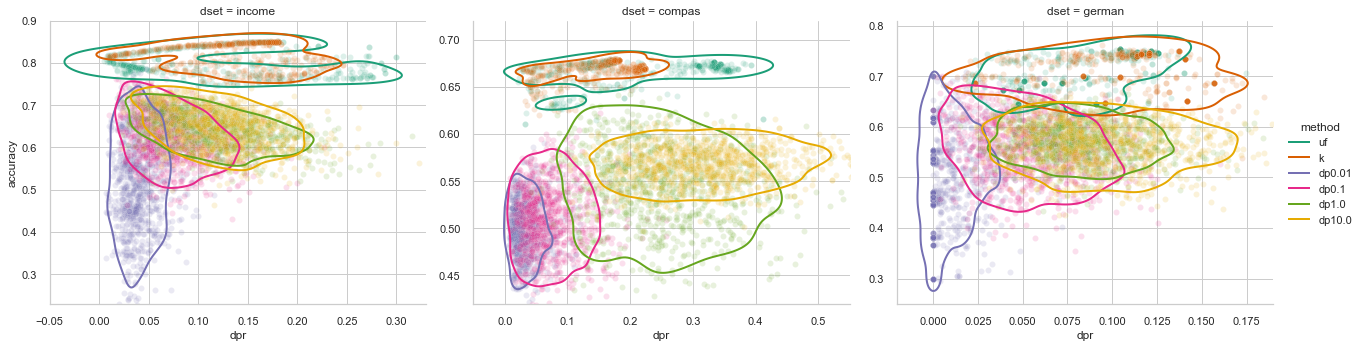

In [395]:
g = (sns.FacetGrid(data=df, col='dset', hue='method', sharex=False, sharey=False, 
                   height=5, aspect=1.2, palette="Dark2")
     .map(sns.scatterplot, "dpr", "accuracy", alpha=0.15)
     .map(sns.kdeplot, "dpr", "accuracy", levels=1, thresh=0.15, linewidths=2)
     .add_legend()
    )
axes = g.axes
axes[0,0].set_xlim(left=-0.05, right=0.33)
axes[0,0].set_ylim(bottom=0.23, top=0.9)
axes[0,1].set_xlim(left=-0.05, right=0.55)
axes[0,1].set_ylim(bottom=0.42, top=0.72)
axes[0,2].set_xlim(left=-0.02, right=0.19)
axes[0,2].set_ylim(bottom=0.25)

# plt.xlim(left=-0.05, right=0.55)
# plt.ylim(bottom=0.4)